In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [60]:
iris = pd.read_csv("Iris.csv")

iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [65]:
x = iris.iloc[:,1:5]

x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


/home/user/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/user/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/user/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For cluster = 1, SSE/WCSS is 680.8244000000001
For cluster = 2, SSE/WCSS is 152.36870647733906
For cluster = 3, SSE/WCSS is 78.94084142614602


/home/user/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/user/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/user/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For cluster = 4, SSE/WCSS is 57.317873214285704
For cluster = 5, SSE/WCSS is 46.535582051282056
For cluster = 6, SSE/WCSS is 38.93873974358974


/home/user/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/user/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/user/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For cluster = 7, SSE/WCSS is 34.30776223776224
For cluster = 8, SSE/WCSS is 30.076048542249342
For cluster = 9, SSE/WCSS is 28.041672719093775


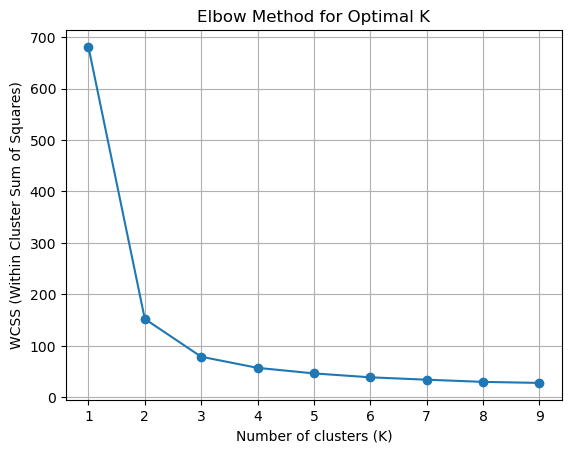

In [72]:
# K Means

# Deciding Value of K
# The most crucial aspect of K-Means clustering is deciding the value of K
# We do this by performing Elbow Analysis 




wcss = []
k_values = list(range(1, 10))

for k in k_values:
    kmeans = KMeans(n_clusters=k, max_iter=100)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    print("For cluster = {}, SSE/WCSS is {}".format(k, kmeans.inertia_))

plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.grid(True)
plt.show()

    

In [73]:
# Running K-Means Model

# We now run K-Means clustering for obtaining a 3 cluster solution.


kmeans = KMeans(n_clusters=k, max_iter=100)
kmeans.fit(x)
iris["cluster"] = kmeans.labels_

/home/user/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [77]:
iris.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
148,149,6.2,3.4,5.4,2.3,Iris-virginica,6
106,107,4.9,2.5,4.5,1.7,Iris-virginica,2
48,49,5.3,3.7,1.5,0.2,Iris-setosa,1
146,147,6.3,2.5,5.0,1.9,Iris-virginica,3
130,131,7.4,2.8,6.1,1.9,Iris-virginica,0
101,102,5.8,2.7,5.1,1.9,Iris-virginica,3
88,89,5.6,3.0,4.1,1.3,Iris-versicolor,2
44,45,5.1,3.8,1.9,0.4,Iris-setosa,1
134,135,6.1,2.6,5.6,1.4,Iris-virginica,3
110,111,6.5,3.2,5.1,2.0,Iris-virginica,6
